In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load csv 
url = 'https://raw.githubusercontent.com/kfern/jupyter/next/covid19-es-and/covid19-es-and.csv'
df = pd.read_csv(url)

In [3]:
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
last_fecha = df['Fecha'].max()

In [4]:
fFechas = pd.date_range(end=last_fecha, freq='7D', periods=4)
filtro = df['Fecha'].isin(fFechas)
dfV = df[filtro].copy()

In [5]:
dfV.set_index(['Provincia', 'Fecha'], inplace=True)
dfV.sort_index(level=['Provincia', 'Fecha'], inplace=True)

In [6]:
dfG = dfV.groupby(level='Provincia').pct_change()*100
dfG.dropna(how='all', inplace=True)
dfG.tail()

Ingresados       Altas      Bajas
Provincia Fecha                                        
Sevilla   2020-04-15   17.464115  106.962025  38.931298
          2020-04-22    7.128310   54.434251  19.780220
Total     2020-04-08   41.817604  471.978022  96.428571
          2020-04-15   15.326014  113.640730  42.975207
          2020-04-22    8.121236   60.476619  21.387283

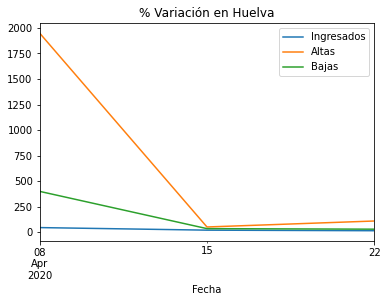

In [7]:
dfG.loc['Huelva'].plot(title='% Variación en Huelva')
plt.show()

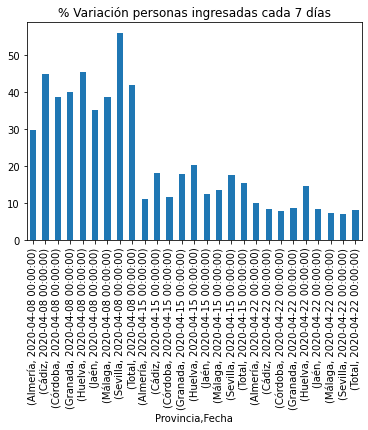

In [8]:
dfG.sort_index(level=['Fecha', 'Provincia'], inplace=True)
dfG['Ingresados'].plot(kind='bar', title='% Variación personas ingresadas cada 7 días')
plt.show()

In [9]:
dfG.describe()

,Ingresados,Altas,Bajas
count,27.000000,27.000000,27.000000
mean,21.782474,357.400860,65.771854
std,14.925742,584.218979,74.331006
min,7.128310,18.181818,15.422886
25%,9.404191,75.092593,30.394525
50%,15.326014,109.677419,42.975207
75%,36.920090,310.504202,77.159091
max,55.970149,2425.000000,400.000000


In [10]:
# Nuevos casos cada x días
dfN = dfV.diff()
first_fecha = fFechas.min()

# Se borra la primera fila ya que no tiene valores anteriores y su resultado no tiene sentido
dfN.drop(index=first_fecha, level='Fecha', inplace=True)
# Alternativa seleccionando las filas y borrando
#delete_rows = dfN.loc[(slice(None), [first_fecha]), :].index
#dfN.drop(delete_rows, inplace=True)

# Se borran las filas de Total
dfN.drop(index='Total', level='Provincia', inplace=True)

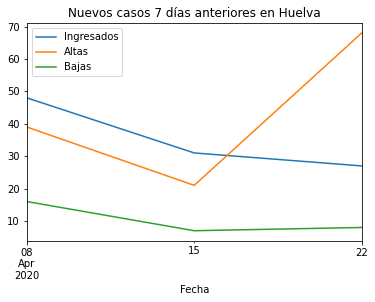

In [11]:
dfN.loc['Huelva'].plot(title='Nuevos casos 7 días anteriores en Huelva')
plt.show()

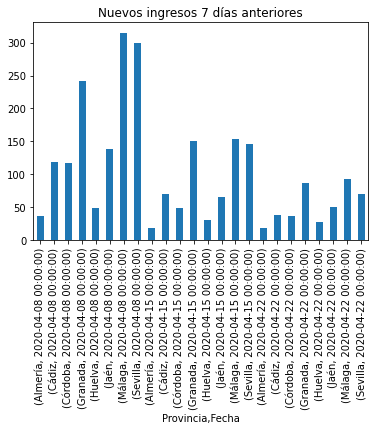

In [12]:
dfN.sort_index(level=['Fecha', 'Provincia'], inplace=True)
dfN['Ingresados'].plot(kind='bar', title='Nuevos ingresos 7 días anteriores')
plt.show()

In [13]:
print('Nuevos casos en Huelva 7 días anteriores')
print(dfN.loc['Huelva'])

Nuevos casos en Huelva 7 días anteriores
            Ingresados  Altas  Bajas
Fecha                               
2020-04-08        48.0   39.0   16.0
2020-04-15        31.0   21.0    7.0
2020-04-22        27.0   68.0    8.0
